# Задание

У каждого есть свой набор данный, который можно найти в ведомости на вкладке "Логистическая регрессия":

https://clck.ru/32AKdJ

Скачиваете свой датасет с kaggle (для этого нужно авторизоваться с гугл аккаунт и скачать датасет).

**Ваша задача:**
1. Исследовать данные
2. Создать тренировочную и тестовую подвыборки
3. Построить модель логистической регрессии по своему набору данных (т.е. создать модель и обучить ее на тренировочной выборке)
4. Получить коэффиценты уравнения логистической регрессии (т.е. уравнение разделяющей поверхности). Сделать вывод какие из признаков оказались наиболее значимыми, какие нет и почему
5. Написать уравнение логистической регрессии.
6. Вывести confusion matrix для получившейся модели.
7. Вручную посчитать метрики: accuracy, recall, precision. f1.
8. Посчитать метрики с помощью библиотеки sklearn и сравнить с оценками из п.7.
9. Сделать письменный вывод получившихся результатов (хорошие или плохие получлись метрики и почему).

ВСЕ графики должны быть подписанны.
Ваша задача получить метрики как можно лучше.

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [188]:
from google.colab import files
uploaded = files.upload()

Saving adult.csv to adult (6).csv


In [189]:
df = pd.read_csv("adult.csv")
df.head()
     

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [190]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [191]:
df = df.drop(columns = ["native.country"])

In [137]:
df["income"].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [136]:
s = pd.Series(list('income')).value_counts

In [96]:
df['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [193]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,0


In [200]:
df = pd.get_dummies (df, columns=['sex'], drop_first= True )

16

In [126]:
len(df['education.num'].unique())

16

In [98]:
d = {"HS-grad": 0, "Some-college": 1, "7th-8th": 2, "10th": 3, "Doctorate": 4, "Prof-school": 5, "Bachelors": 6, "Masters": 7, "11th": 8, "Assoc-acdm": 9, "Assoc-voc": 10, "1st-4th": 11, "5th-6th": 12, "12th": 13, "9th": 14, "Preschool": 15 }
df["education"] = df["education"].map(d)

In [33]:
df['occupation'].unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [99]:
d = {"?": 0, "Exec-managerial": 1, "Machine-op-inspct": 2, "Prof-specialty": 3, "Other-service": 4, "Adm-clerical": 5, "Craft-repair": 6, "Transport-moving": 7, "Handlers-cleaners": 8, "Sales": 9, "Tech-support": 10, 'Protective-serv': 11, 'Armed-Forces': 12, 'Priv-house-serv': 13, "Farming-fishing" : 14 }
df["occupation"] = df["occupation"].map(d)

In [42]:
df['relationship'].unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

In [100]:
d = {"Not-in-family": 0, "Unmarried": 1, "Own-child": 2, "Other-relative": 3, "Husband": 4, "Wife": 5 }
df["relationship"] = df["relationship"].map(d)

In [192]:
d = {"<=50K": 0, ">50K": 1}
df["income"] = df["income"].map(d)

In [102]:
d = {"Female": 0, "Male": 1}
df["sex"] = df["sex"].map(d)

In [72]:
df['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [184]:
df

,fnlwgt,capital.loss,education_12th,education_Assoc-acdm,education_Assoc-voc,education_Preschool,workclass_Never-worked,workclass_Without-pay,occupation_Armed-Forces,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,marital.status_Married-AF-spouse,marital.status_Married-spouse-absent,marital.status_Separated,relationship_Other-relative
0,77053,4356,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,132870,4356,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,186061,4356,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,140359,3900,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,264663,3900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,310152,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32557,257302,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
32558,154374,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
32559,151910,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


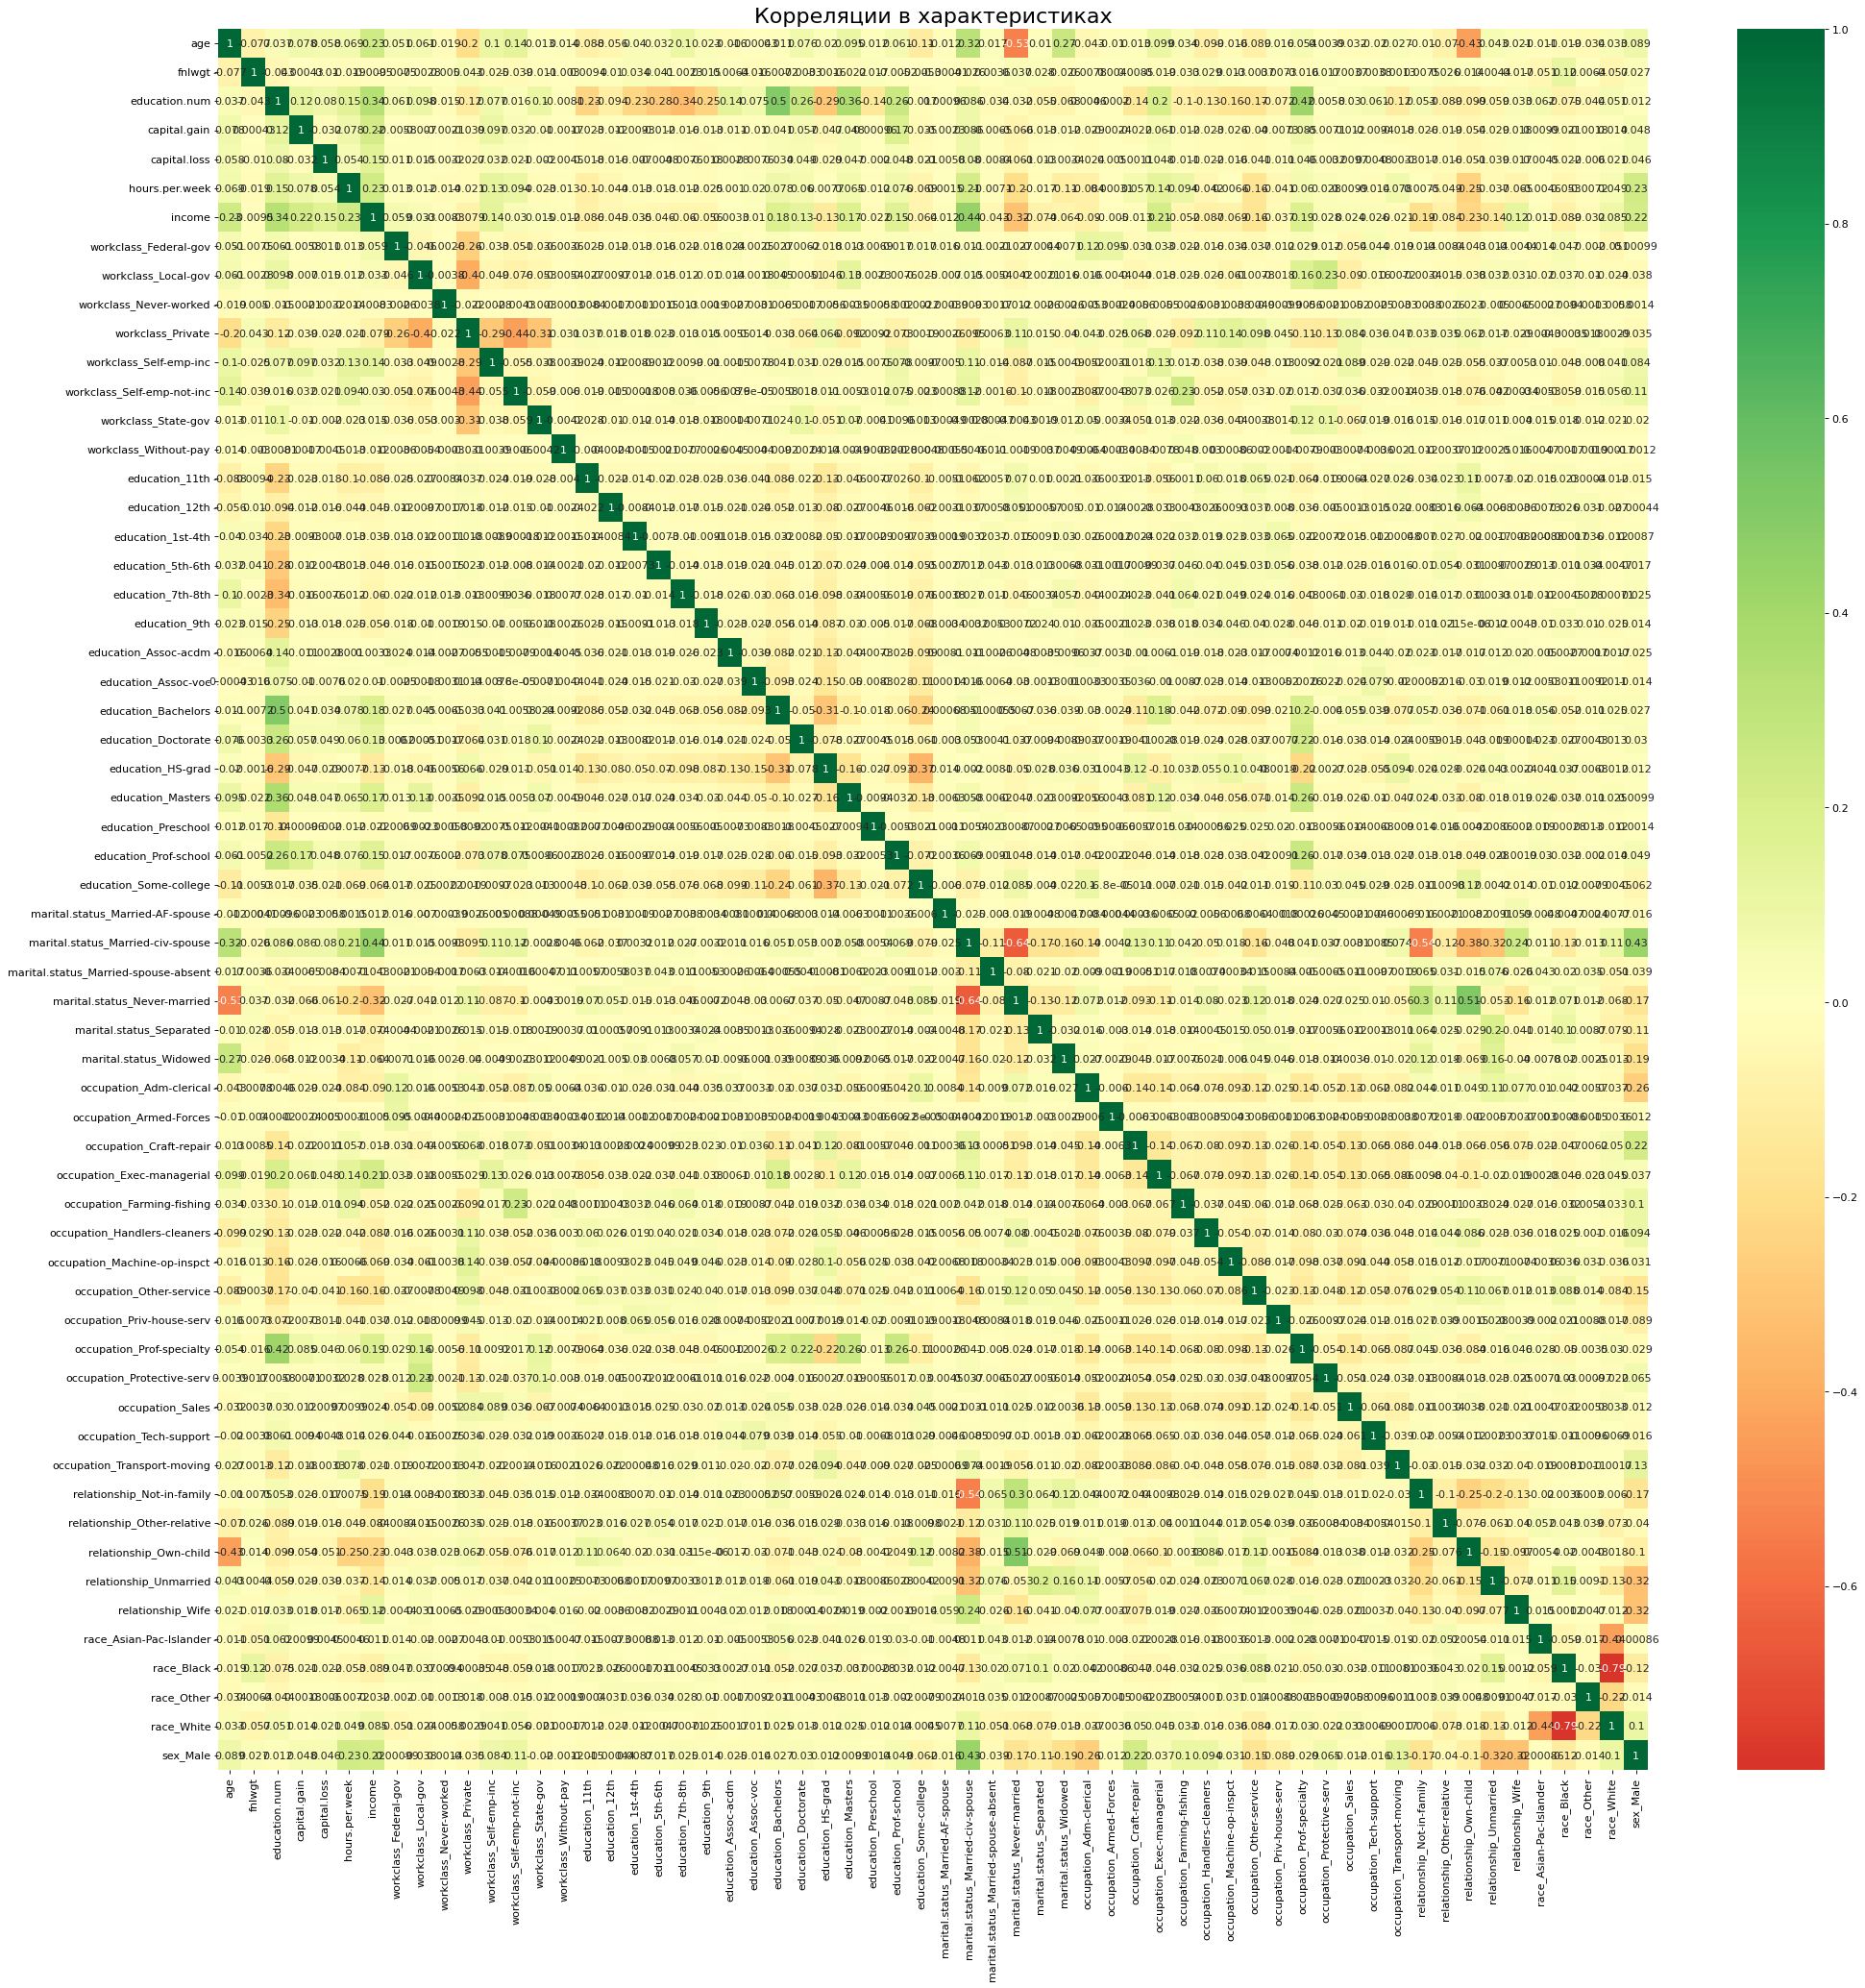

In [201]:
plt.figure(figsize=(30,30), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляции в характеристиках', fontsize=20)
plt.show()

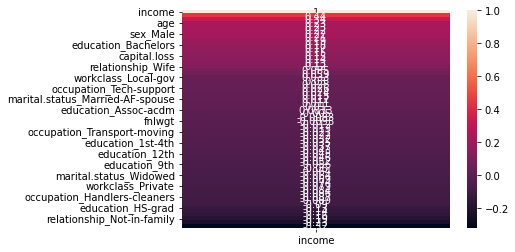

In [219]:
corr = df.corr()[['income']].sort_values(by='income', ascending=False)
sns.heatmap(corr, annot=True)

In [220]:
corr

,income
income,1.000000
marital.status_Married-civ-spouse,0.444696
education.num,0.335154
age,0.234037
hours.per.week,0.229689
capital.gain,0.223329
sex_Male,0.215980
occupation_Exec-managerial,0.214861
occupation_Prof-specialty,0.185866
education_Bachelors,0.180485


In [225]:
dv = df [["race_Other","education_Preschool","occupation_Exec-managerial","sex_Male","income","marital.status_Married-civ-spouse","education.num","age","hours.per.week","capital.gain","relationship_Own-child", "marital.status_Never-married"]]


In [226]:
dv

,race_Other,education_Preschool,occupation_Exec-managerial,sex_Male,income,marital.status_Married-civ-spouse,education.num,age,hours.per.week,capital.gain,relationship_Own-child,marital.status_Never-married
0,0,0,0,0,0,0,9,90,40,0,0,0
1,0,0,1,0,0,0,9,82,18,0,0,0
2,0,0,0,0,0,0,10,66,40,0,0,0
3,0,0,0,0,0,0,4,54,40,0,0,0
4,0,0,0,0,0,0,10,41,40,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,1,0,0,10,22,40,0,0,1
32557,0,0,0,0,0,1,12,27,38,0,0,0
32558,0,0,0,1,1,1,9,40,40,0,0,0
32559,0,0,0,0,0,0,9,58,40,0,0,0


In [227]:
y = dv["income"]
X = dv.drop(["income"], axis=1)

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [229]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [230]:
w0 = model.intercept_
w1 = model.coef_
w0

array([-0.76034875])

In [231]:
w1

array([[-3.05463190e-02, -1.11221052e-02,  5.11810886e-01,
         3.75352125e-01,  1.56436770e+00,  8.97078403e-02,
        -3.36198710e-02, -2.34141998e-02,  2.99202722e-04,
        -8.96021792e-01, -1.59681582e+00]])

In [118]:
s = f"y = {w0[0]}"
for i in range(len(w1[0])):
  s += f" + {w1[0][i]} * x{i + 1}"
print(s)

y = -0.011026928623590828 + 0.012981604374367033 * x1 + 0.007922884521745154 * x2 + -3.723237923338293e-06 * x3 + 0.0122459259696463 * x4 + -0.003318920609846049 * x5 + -0.08966411736675597 * x6 + 0.06545963801461274 * x7 + -0.008034488891154235 * x8 + 0.006931591535525222 * x9 + 0.00030264801409321865 * x10 + 0.0006601070230081359 * x11 + -0.020776237083166317 * x12


In [119]:
df

,age,workclass,fnlwgt,education,education.num,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,0,77053,0,9,0,0,0,0,0,4356,40,0
1,82,1,132870,0,9,1,0,0,0,0,4356,18,0
2,66,0,186061,1,10,0,1,1,0,0,4356,40,0
3,54,1,140359,2,4,2,1,0,0,0,3900,40,0
4,41,1,264663,1,10,3,2,0,0,0,3900,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,1,310152,1,10,11,0,0,1,0,0,40,0
32557,27,1,257302,9,12,10,5,0,0,0,0,38,0
32558,40,1,154374,0,9,2,4,0,1,0,0,40,1
32559,58,1,151910,0,9,5,1,0,0,0,0,40,0


Самые важные признаки в порядке убывания: hours.per.week и age, потому что их коэффициенты по модулю имеют наибольшее значение




In [232]:
pred = model.predict(X_test)
confusion_matrix(y_test, pred)

array([[6682,  749],
       [1354,  984]])

In [233]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

TN: 6682
FP: 749
FN: 1354
TP: 984


In [234]:
print('accuracy',(tp + tn) / (tp + tn + fp + fn))
accuracy_score(y_test, pred)

accuracy 0.7847271982802744


0.7847271982802744

In [235]:
print('recall',tp / (tp + fn))
recall_score(y_test, pred)

recall 0.42087254063301965


0.42087254063301965

In [236]:
print('precision',tp / (tp + fp))
precision_score(y_test, pred)

precision 0.5678015002885171


0.5678015002885171

In [237]:
print('f1',2 * ((tp / (tp + fn)) * (tp / (tp + fp))) / ((tp / (tp + fn)) + (tp / (tp + fp))))
f1_score(y_test, pred)

f1 0.48341930729550486


0.48341930729550486

In [112]:
df

,age,workclass,fnlwgt,education,education.num,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,0,77053,0,9,0,0,0,0,0,4356,40,0
1,82,1,132870,0,9,1,0,0,0,0,4356,18,0
2,66,0,186061,1,10,0,1,1,0,0,4356,40,0
3,54,1,140359,2,4,2,1,0,0,0,3900,40,0
4,41,1,264663,1,10,3,2,0,0,0,3900,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,1,310152,1,10,11,0,0,1,0,0,40,0
32557,27,1,257302,9,12,10,5,0,0,0,0,38,0
32558,40,1,154374,0,9,2,4,0,1,0,0,40,1
32559,58,1,151910,0,9,5,1,0,0,0,0,40,0


В целом, модель работает не плохо, потому что accuracy равен 0.8. А precision равен 0.7, только recall не очень хорошо, вследствие чего и падает f1.